In [1]:
import os
from fastai.vision.all import *

In [2]:
path = '/datasets/bees-gcp/train'

In [3]:
dblock = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                   get_items=get_image_files,
                   get_y=parent_label,
                   item_tfms=Resize(460),
                   batch_tfms=aug_transforms(size=400, min_scale=0.75, flip_vert=True))
dls = dblock.dataloaders(path, bs=4)

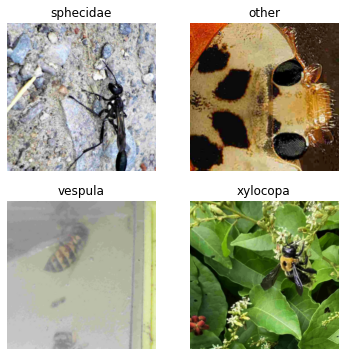

In [4]:
dls.show_batch(nrows=2, ncols=2)

In [5]:
learn = vision_learner(dls, xresnet34, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
#learn.load('bee34')
#learn.lr_find()

Downloading: "https://s3.amazonaws.com/fast-ai-modelzoo/xrn50_940.pth" to /root/.cache/torch/hub/checkpoints/xrn50_940.pth


  0%|          | 0.00/244M [00:00<?, ?B/s]

SuggestedLRs(valley=0.001737800776027143)

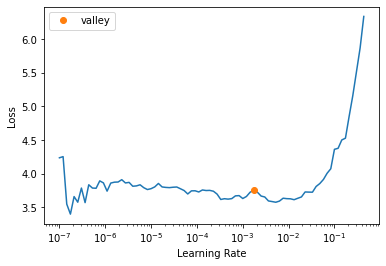

In [6]:
# learn.fit_one_cycle(3,6e-3)
# learn.unfreeze()
learn.lr_find()

In [7]:
learn.fine_tune(16,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.919297,1.970455,0.319383,15:55


epoch,train_loss,valid_loss,accuracy,time
0,1.928627,1.739483,0.367040,14:04
1,1.755617,1.786392,0.367141,14:06
2,1.715605,1.662110,0.408190,14:06
3,1.696150,1.643101,0.443933,14:07
4,1.536746,1.426802,0.492191,14:09
5,1.474590,1.366285,0.539948,14:09
6,1.482718,1.321534,0.551562,14:08
7,1.404561,1.219794,0.601522,14:09
8,1.256177,1.246809,0.599519,14:05
9,1.247558,1.181582,0.611634,14:04


In [8]:
#looks like the ideal number of epochs with this architecture is 7, with an accuracy around 77%. Next idea: deeper architecture, or else try some of the techniques in Fastbook7.
learn.save('bee34')

Path('models/bee34.pth')

In [7]:
interp = ClassificationInterpretation.from_learner(learn)

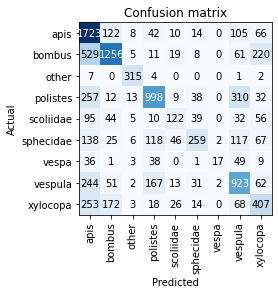

In [8]:
interp.plot_confusion_matrix()

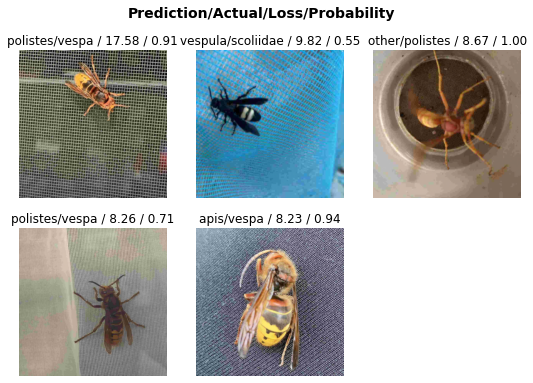

In [10]:
interp.plot_top_losses(5)